In [1]:
!gdown 12rujqW63WWCm70ePLVIXN0EYyygP5zpO

Downloading...
From: https://drive.google.com/uc?id=12rujqW63WWCm70ePLVIXN0EYyygP5zpO
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 10.2MB/s]


In [44]:
import pandas as pd
df= pd.read_csv('netflix.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


**Exploring basic Metrics**

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
release_year_min = df['release_year'].min()
release_year_max = df['release_year'].max()
print(release_year_min)
print(release_year_max)

1925
2021


In [46]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [ ]:
date_added_dt = pd.to_datetime(df['date_added'].str.strip())
min_date_added = min(date_added_dt)
max_date_added = max(date_added_dt)
print(min_date_added)
print(max_date_added)

Bivariate analysis: Understand how many titles were released per year in netflix. This will help us understand if there were some years where the number of titles release were unusually low/high

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())

In [61]:
df['date_added_year'] = df['date_added'].dt.year
df['date_added_month'] = df['date_added'].dt.month

In [62]:
df_release_count_year = df.groupby('date_added_year')['title'].count().reset_index()
df_release_count_year

,date_added_year,title
0,2008.0,2
1,2009.0,2
2,2010.0,1
3,2011.0,13
4,2012.0,3
5,2013.0,11
6,2014.0,24
7,2015.0,82
8,2016.0,429
9,2017.0,1188


In [63]:
df_release_count_month = df.groupby('date_added_month')['title'].count().reset_index()
df_release_count_month

,date_added_month,title
0,1.0,738
1,2.0,563
2,3.0,742
3,4.0,764
4,5.0,632
5,6.0,728
6,7.0,827
7,8.0,755
8,9.0,770
9,10.0,760


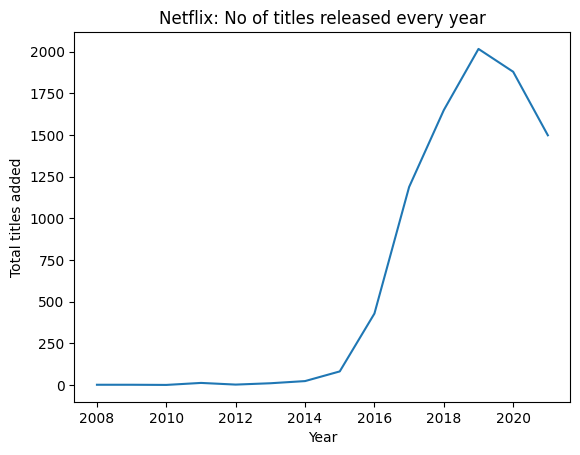

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=df_release_count_year["date_added_year"], y=df_release_count_year["title"])
plt.title("Netflix: No of titles released every year")
plt.xlabel("Year")
plt.ylabel("Total titles added")
plt.show()

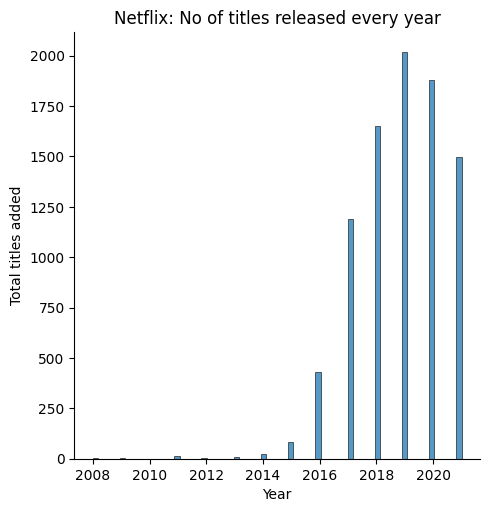

In [75]:
sns.displot(data=df, x="date_added_year")
plt.title("Netflix: No of titles released every year")
plt.xlabel("Year")
plt.ylabel("Total titles added")
plt.show()

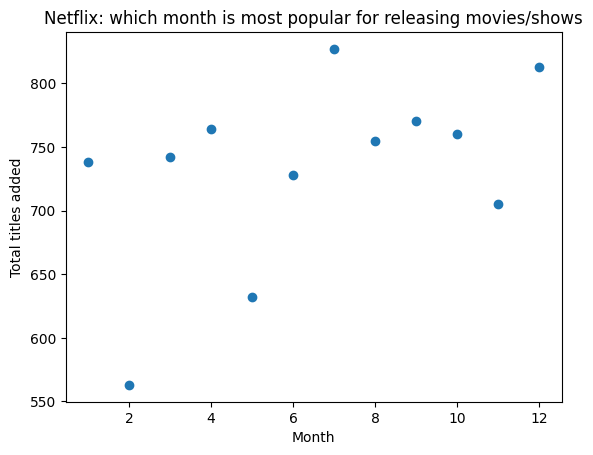

In [71]:
plt.scatter(x=df_release_count_month["date_added_month"], y=df_release_count_month["title"])
plt.title("Netflix: which month is most popular for releasing movies/shows")
plt.xlabel("Month")
plt.ylabel("Total titles added")
plt.show()

**Statistical Summary**

In [9]:
df.shape

(8807, 12)

Detect null values in data

In [10]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [11]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [12]:
df = df.fillna('Not Available')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Unnest columns with nested data**

In [13]:
df_country = df['country'].str.split(',', expand=True).stack().reset_index().drop(columns = ['level_1'])
df_country

,level_0,0
0,0,United States
1,1,South Africa
2,2,Not Available
3,3,Not Available
4,4,India
...,...,...
10845,8802,United States
10846,8803,Not Available
10847,8804,United States
10848,8805,United States


In [14]:
df_country.columns = ['index', 'country']
df_country

,index,country
0,0,United States
1,1,South Africa
2,2,Not Available
3,3,Not Available
4,4,India
...,...,...
10845,8802,United States
10846,8803,Not Available
10847,8804,United States
10848,8805,United States


In [22]:
df_merge_country = pd.merge(df, df_country, left_index=True, right_on='index').drop(columns=['index', 'country_x'])
df_merge_country.rename(columns={"country_y": "country"}, inplace=True)

Top 3 countries for maximum movies listed

In [16]:
country_count = pd.DataFrame(df_merge_country.groupby("country")['title'].count().sort_values(ascending=False).reset_index())
country_count[country_count['country'] != 'Not Available'].head(3)

,country,title
0,United States,3211
1,India,1008
3,United Kingdom,628


In [80]:
df_cast = df['cast'].str.split(',', expand=True).stack().reset_index().drop(columns = ['level_1'])

In [81]:
df_cast.columns = ['index', 'cast']
df_cast

,index,cast
0,0,Not Available
1,1,Ama Qamata
2,1,Khosi Ngema
3,1,Gail Mabalane
4,1,Thabang Molaba
...,...,...
64946,8806,Manish Chaudhary
64947,8806,Meghna Malik
64948,8806,Malkeet Rauni
64949,8806,Anita Shabdish


In [87]:
df_merge_cast = pd.merge(df, df_cast, left_index=True, right_on='index').drop(columns=['index', 'cast_x'])
df_merge_cast.rename(columns={"cast_y": "cast"}, inplace=True)
df_merge_cast

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Not Available
1,s2,TV Show,Blood & Water,Not Available,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata
2,s2,TV Show,Blood & Water,Not Available,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema
3,s2,TV Show,Blood & Water,Not Available,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane
4,s2,TV Show,Blood & Water,Not Available,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba
...,...,...,...,...,...,...,...,...,...,...,...,...
64946,s8807,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Manish Chaudhary
64947,s8807,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Meghna Malik
64948,s8807,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Malkeet Rauni
64949,s8807,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Anita Shabdish


Cast with most number of films listed in netflix

In [109]:
most_films_count=pd.DataFrame(df_merge_cast.groupby('cast')['title'].count().sort_values(ascending=False).reset_index())
most_films_count[most_films_count['cast'] != 'Not Available'].head(3)

,cast,title
1,Anupam Kher,39
2,Rupa Bhimani,31
3,Takahiro Sakurai,30


In [77]:
df_listedin = df['listed_in'].str.split(',', expand=True).stack().reset_index().drop(columns = ['level_1'])

In [78]:
df_listedin.columns = ['index', 'listed_in']
df_listedin

,index,listed_in
0,0,Documentaries
1,1,International TV Shows
2,1,TV Dramas
3,1,TV Mysteries
4,2,Crime TV Shows
...,...,...
19318,8805,Children & Family Movies
19319,8805,Comedies
19320,8806,Dramas
19321,8806,International Movies


In [79]:
df_merge_listedin = pd.merge(df, df_listedin, left_index=True, right_on='index').drop(columns=['index', 'listed_in_x'])
df_merge_listedin.rename(columns={"listed_in_y": "listed_in"}, inplace=True)
df_merge_listedin

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,date_added_year,date_added_month,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",2021.0,9.0,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,International TV Shows
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,TV Dramas
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,TV Mysteries
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021.0,9.0,Crime TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19318,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Dragged from civilian life, a former superhero...",2020.0,1.0,Children & Family Movies
19319,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Dragged from civilian life, a former superhero...",2020.0,1.0,Comedies
19320,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,2019.0,3.0,Dramas
19321,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,2019.0,3.0,International Movies


Most famous category of shows in Netflix

In [86]:
most_famous_category=pd.DataFrame(df_merge_listedin.groupby('listed_in')['title'].count().sort_values(ascending=False).reset_index())
top7_genre = most_famous_category.head(7)

,listed_in,title
0,International Movies,2624
1,Dramas,1600
2,Comedies,1210
3,Action & Adventure,859
4,Documentaries,829
5,Dramas,827
6,International TV Shows,774


Univariate analysis: Plot top 7 genre in Netflix as percentage using pie chart

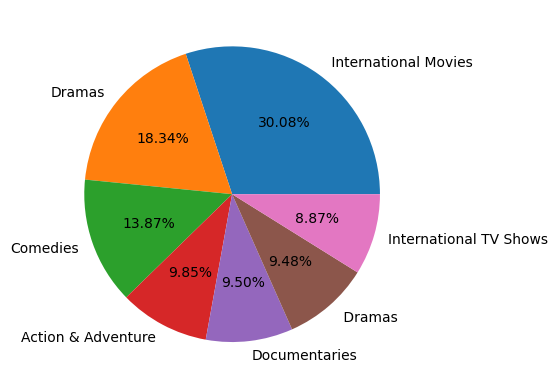

In [81]:
import matplotlib.pyplot as plt
plt.pie(top7_genre['title'], labels=top7_genre['listed_in'],autopct="%.2f%%")
plt.show()

In [88]:
df_top7_genre = df[df['listed_in'].isin(top7_genre['listed_in'])]
df_top7_genre

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,date_added_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021.0,9.0
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,NaN,NaN,2021-09-16,2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,2021.0,9.0
46,s47,Movie,Safe House,Daniel Espinosa,"Denzel Washington, Ryan Reynolds, Vera Farmiga...","South Africa, United States, Japan",2021-09-16,2012,R,115 min,Action & Adventure,Young CIA operative Matt Weston must get a dan...,2021.0,9.0
81,s82,Movie,Kate,Cedric Nicolas-Troyan,"Mary Elizabeth Winstead, Jun Kunimura, Woody H...",United States,2021-09-10,2021,R,106 min,Action & Adventure,"Slipped a fatal poison on her final job, a rut...",2021.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8738,s8739,Movie,Why Knot,Dhruv Dhawan,NaN,"Canada, India, Thailand, United States, United...",2017-10-15,2016,TV-MA,84 min,Documentaries,"Pressured by his traditional family to marry, ...",2017.0,10.0
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,2017-03-31,1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...,2017.0,3.0
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,2017-03-31,1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,2017.0,3.0
8764,s8765,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,2020-01-01,1994,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...,2020.0,1.0


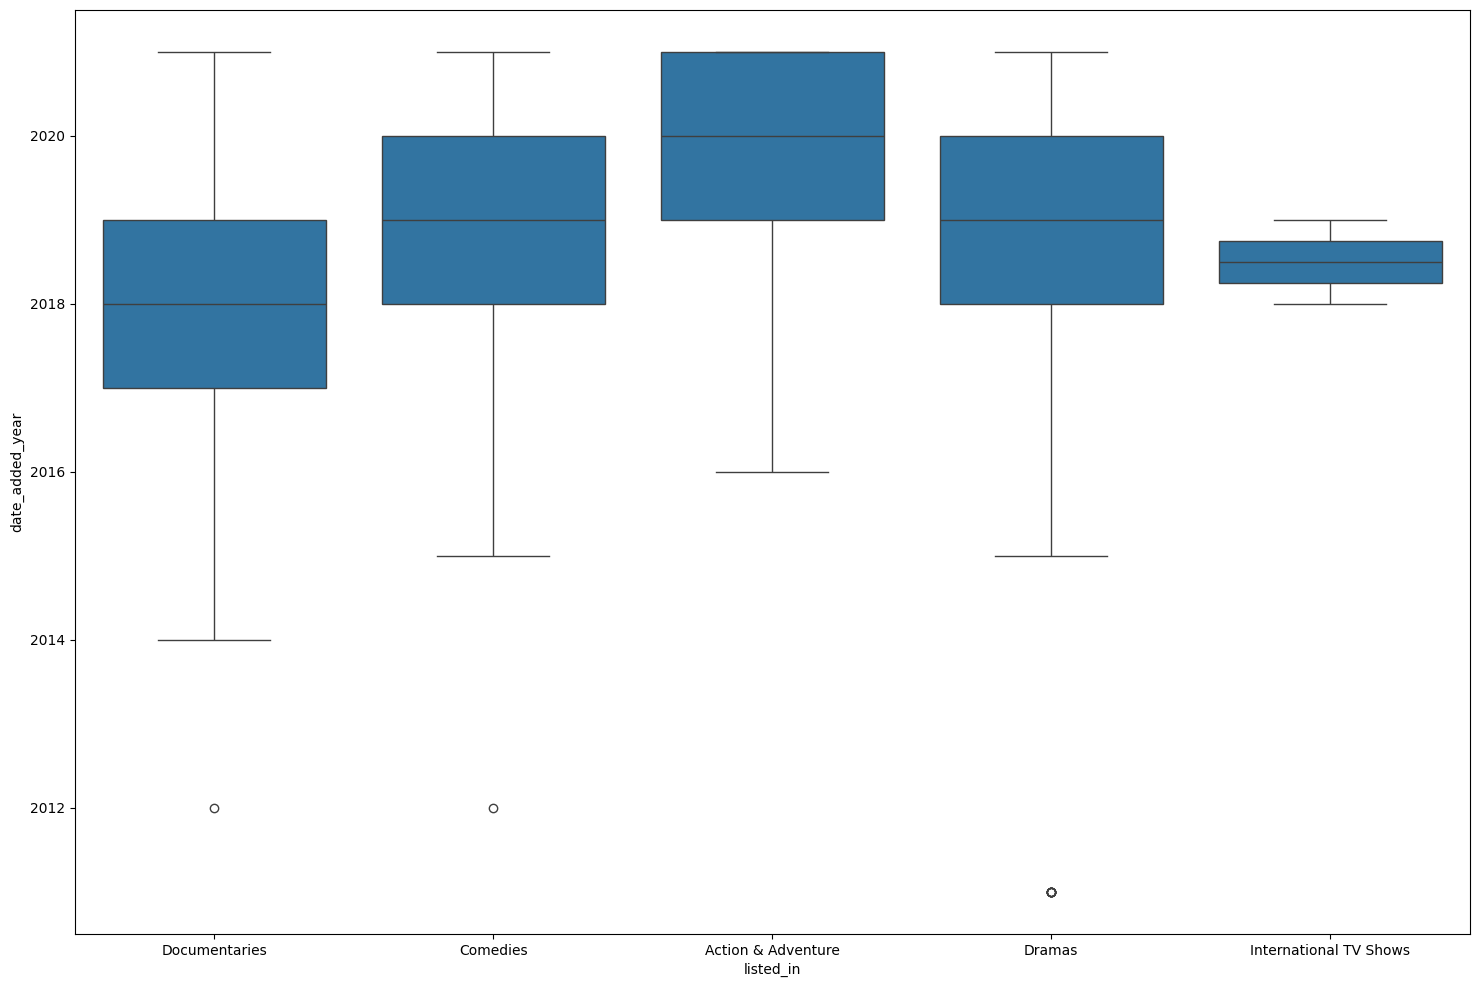

In [98]:
plt.figure(figsize=(18,12))
sns.boxplot(x="listed_in", y="date_added_year", data=df_top7_genre)
plt.title("Netflix: Distribution of movie/show types by year")
plt.xlabel("Type of movies/shows")
plt.ylabel("Year added")
plt.show()

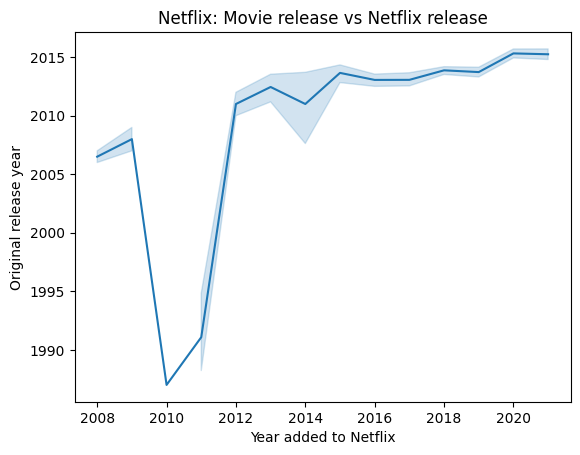

In [109]:
sns.lineplot(x=df["date_added_year"], y=df["release_year"])
plt.title("Netflix: Movie release vs Netflix release")
plt.xlabel("Year added to Netflix")
plt.ylabel("Original release year")
plt.show()